In [48]:
import pandas as pd

titanic = pd.read_csv('./titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


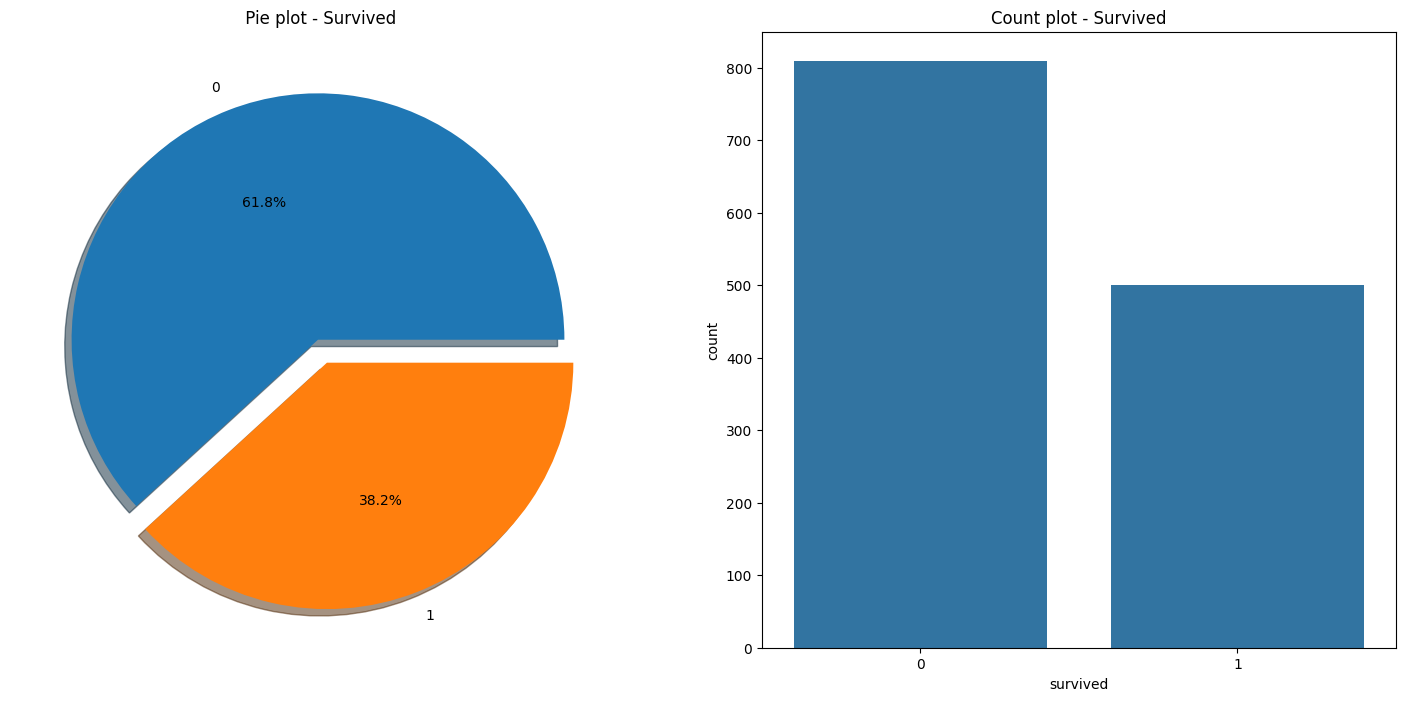

In [49]:
#생존 상황
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1,2, figsize=(18,8))

titanic['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title(' Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()


ax[0], ax[1]은 subplot의 각각의 축을 의미.
matplotlib.pyplot.subplots() 함수를 통해 2개의 그래프를 만들 수 있는 공간 만들고
그 안에 2개의 좌표 축 axws 만든거다.

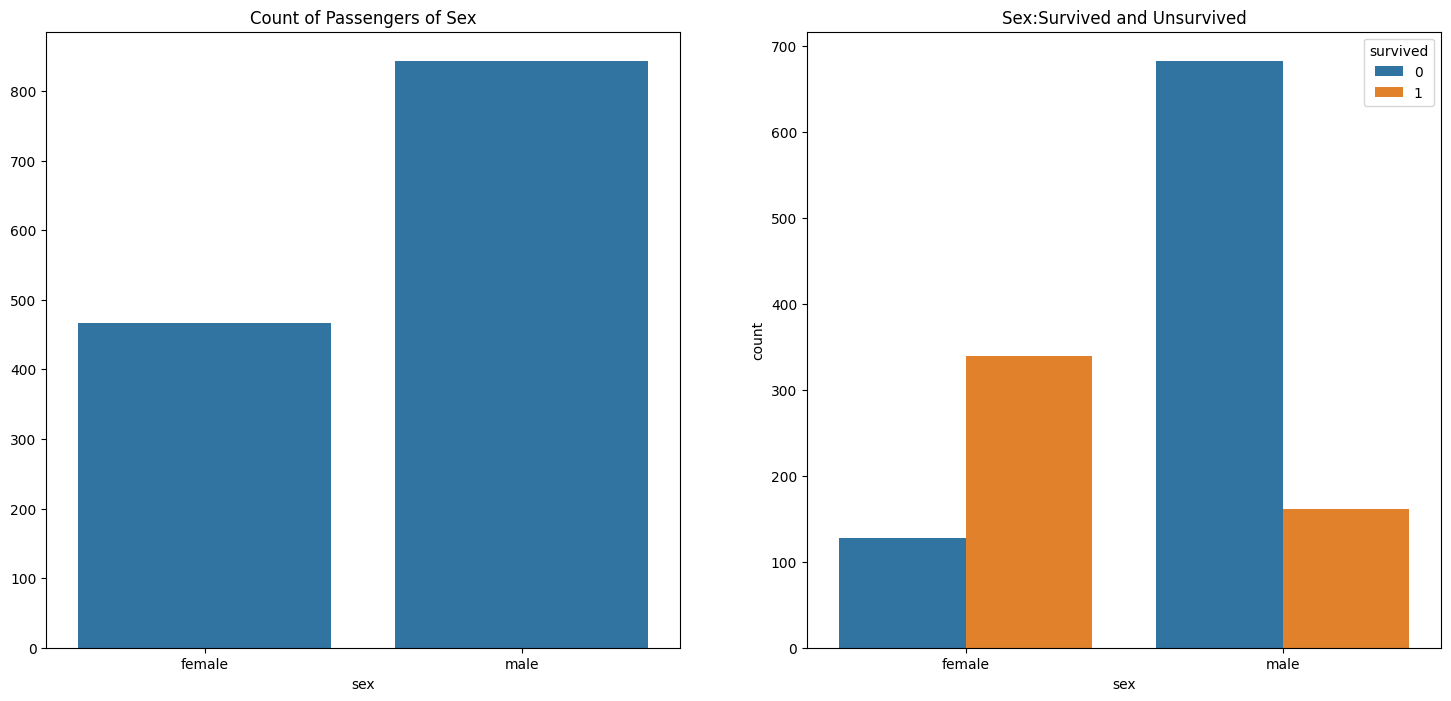

In [50]:
f, ax = plt.subplots(1,2, figsize=(18, 8))

sns.countplot(data=titanic, x='sex', ax=ax[0])
ax[0].set_title('Count of Passengers of Sex')
ax[0].set_ylabel('')

sns.countplot(data=titanic, x='sex', hue='survived', ax=ax[1])
ax[1].set_title('Sex:Survived and Unsurvived')

plt.show()

In [51]:
#경제력 대비 생존률
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


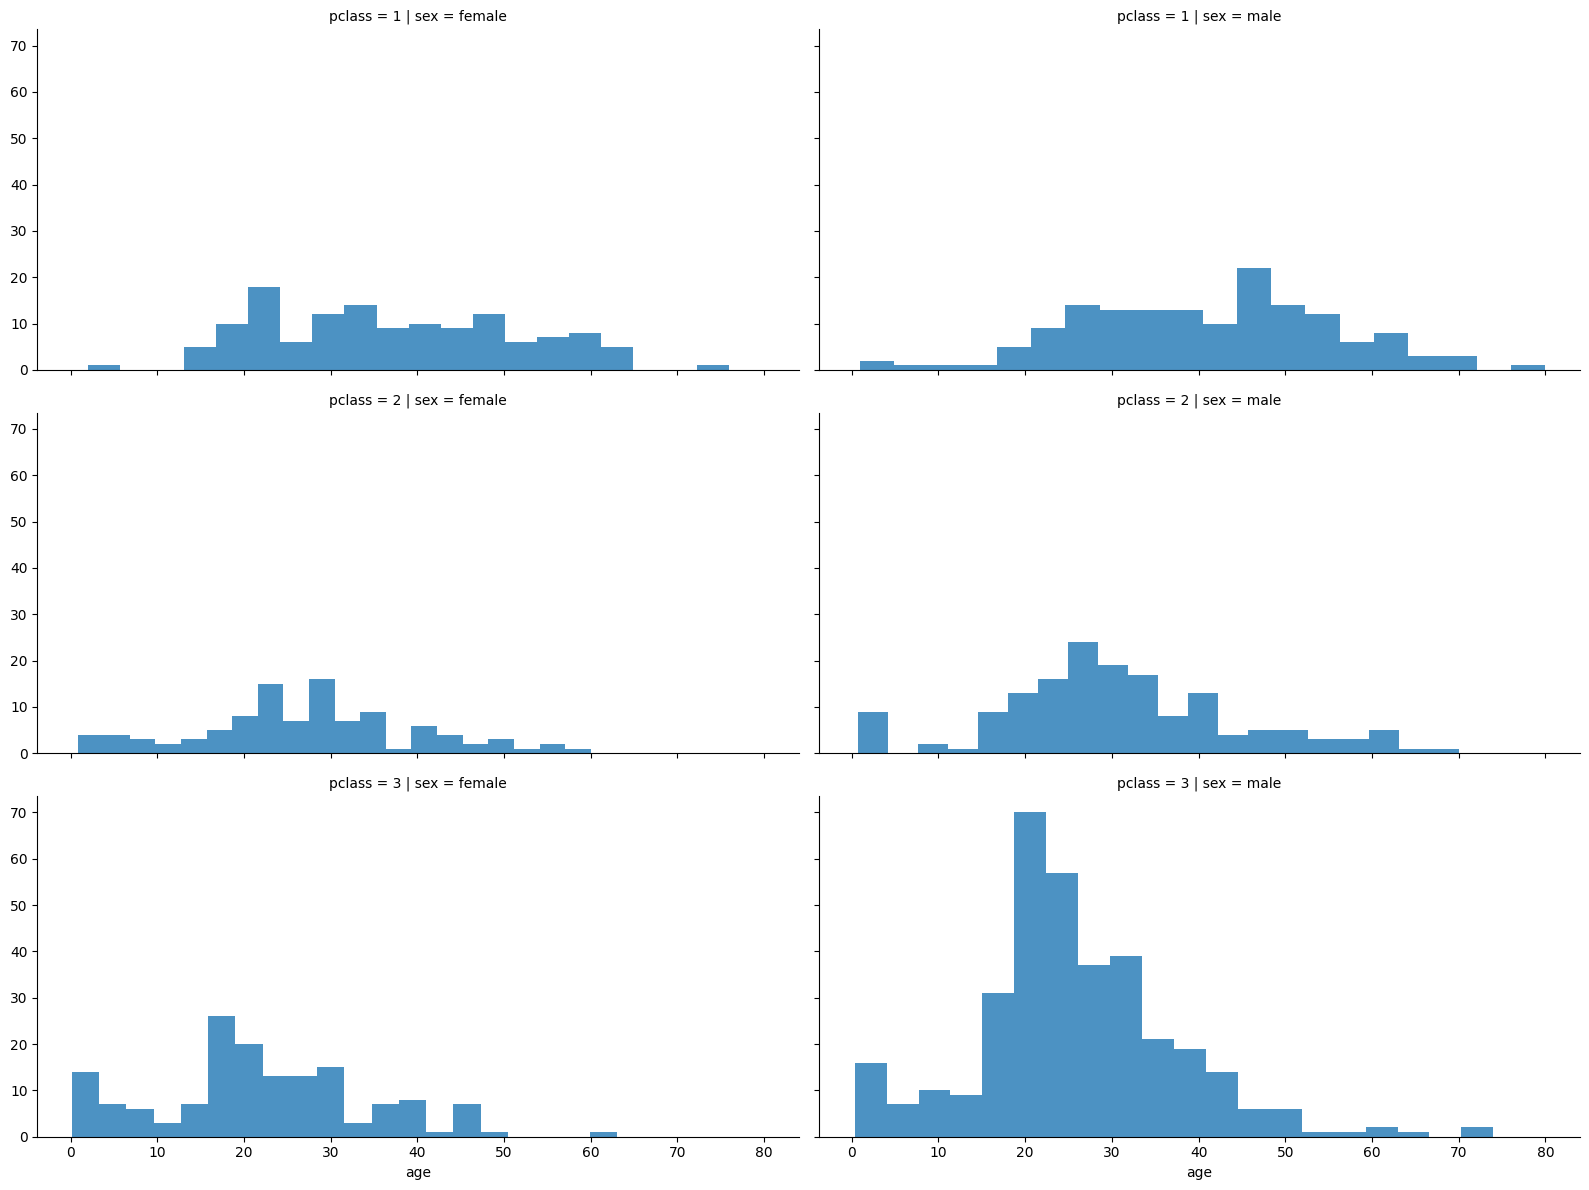

In [52]:
#선실 등급별 성별 현황
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.8, bins=20)

In [53]:
#나이별 승객 현황
import plotly.express as px

fig = px.histogram(titanic, x='age')
fig.show()

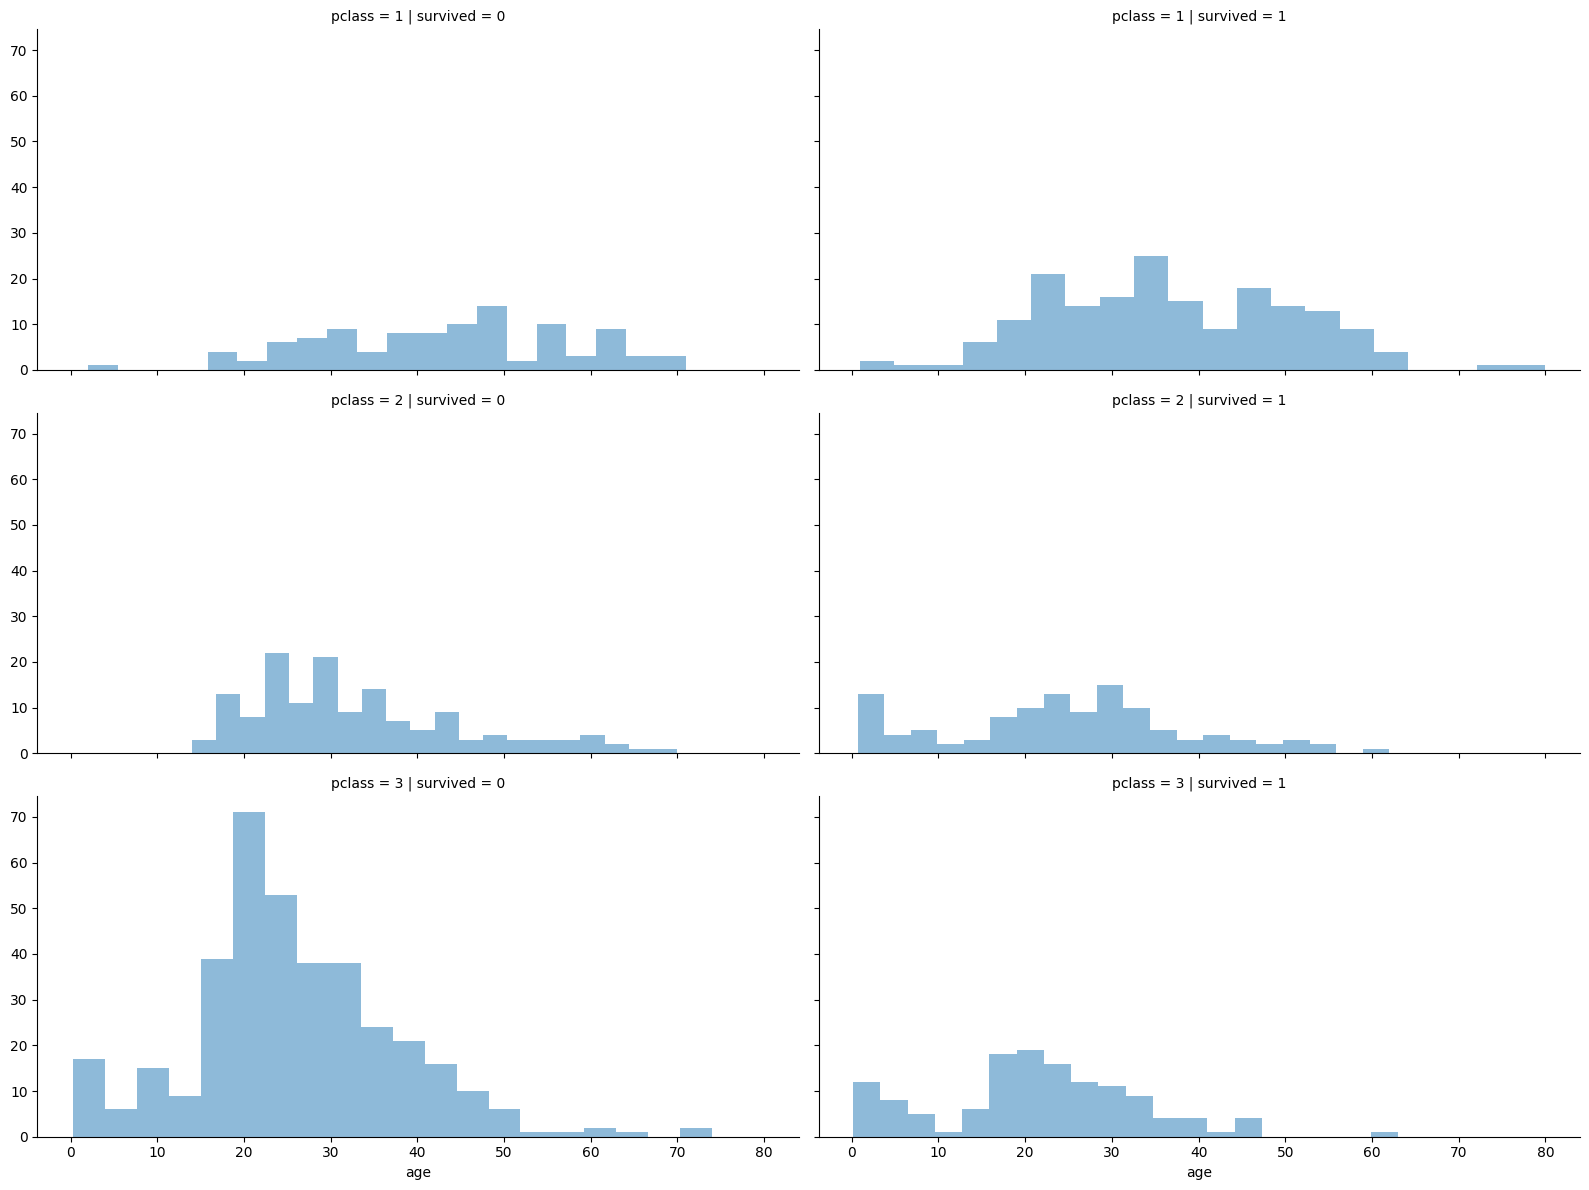

In [54]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)

FacetGrid는 데이터를 여러 조건별로 나눠서 subplot 형태로 시각화.
height=4 ->subplot 세로 길이
aspect=2 ->subplot 가로 길이를 세로의 2배로

In [55]:
titanic['age_cat'] = pd.cut(titanic['age'], bins=[0,7,15,30,60,100], include_lowest=True, labels = ['baby', 'teen', 'young', 'adult', 'old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


bins를 통해 나이를 5구간으로 나눔.
0~7: 'baby'
7~15: 'teen'
15~30: 'young'
30~60: 'adult'
60~100: 'old'

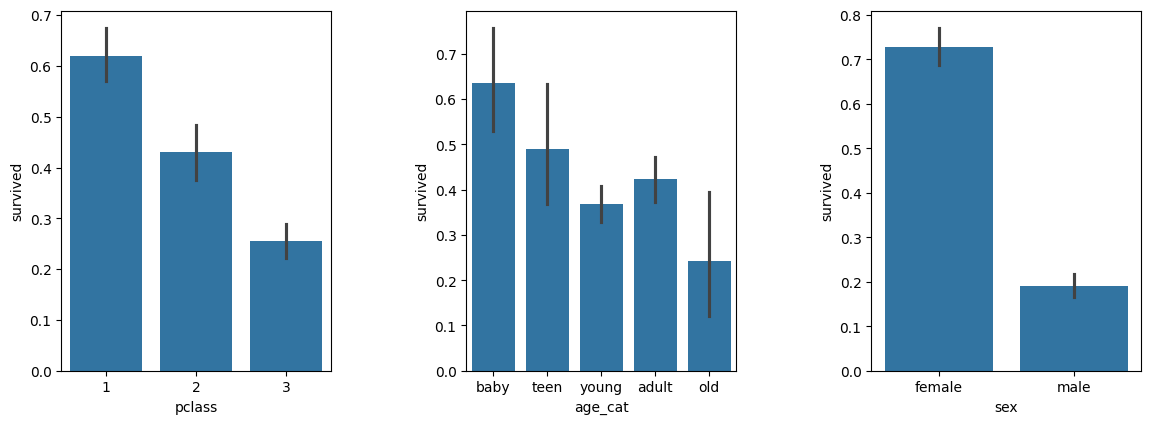

In [56]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.barplot(data=titanic, x='pclass', y='survived')
plt.subplot(132)
sns.barplot(data=titanic, x='age_cat', y='survived')
plt.subplot(133)
sns.barplot(data=titanic, x='sex', y='survived')

plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)


In [57]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
dtypes: category(1), float64(3), int64(4), object(7)
memory usage: 144.8+ KB


In [58]:
titanic['sex'].unique()

array(['female', 'male'], dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,0


In [60]:
titanic.isnull().any()

pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
age_cat       True
gender       False
dtype: bool

In [61]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['embarked'].notnull()]
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1044 non-null   int64   
 1   survived   1044 non-null   int64   
 2   name       1044 non-null   object  
 3   sex        1044 non-null   object  
 4   age        1044 non-null   float64 
 5   sibsp      1044 non-null   int64   
 6   parch      1044 non-null   int64   
 7   ticket     1044 non-null   object  
 8   fare       1043 non-null   float64 
 9   cabin      270 non-null    object  
 10  embarked   1044 non-null   object  
 11  boat       415 non-null    object  
 12  body       120 non-null    float64 
 13  home.dest  684 non-null    object  
 14  age_cat    1044 non-null   category
 15  gender     1044 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(7)
memory usage: 127.6+ KB


C:\Users\aidan\AppData\Local\Temp\ipykernel_31436\2660759318.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

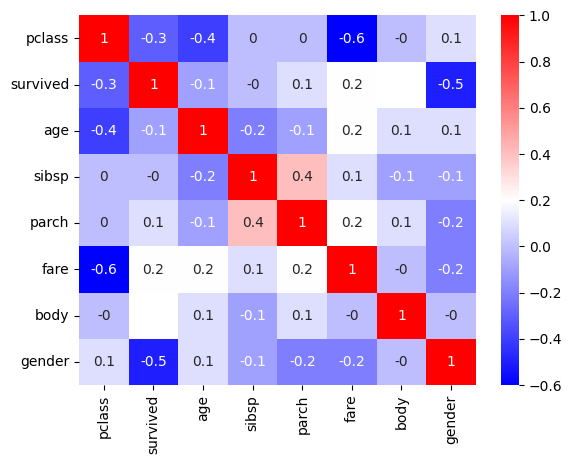

In [62]:
correlation_matrix = titanic.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

In [63]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['pclass'].notnull()]
titanic = titanic[titanic['sibsp'].notnull()]
titanic = titanic[titanic['parch'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic = titanic[titanic['gender'].notnull()]




In [64]:
#먼저 특성을 선택하고 데이터 나누기
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=2, random_state=13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))


0.7703349282296651


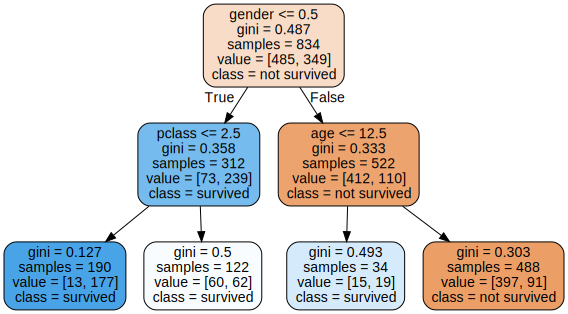

In [66]:
#decision tree에서 중요한 특성 확인
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(dt, feature_names=X.columns, class_names=['not survived', 'survived'], rounded=True, filled=True))

In [67]:
#Logistic Regression 적용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=13, solver='liblinear')
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))


0.7655502392344498


In [68]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS.fit(X)

X_ss = SS.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=13)

lr.fit(X_train, y_train)


LogisticRegression(random_state=13, solver='liblinear')

In [72]:
pred = lr.predict(X_train)
print("Train Acc: ", accuracy_score(y_train, pred))

pred = lr.predict(X_test)
print("Test Acc: ", accuracy_score(y_test, pred))

Train Acc:  0.7817745803357314
Test Acc:  0.7751196172248804


In [73]:
#디카프리오 특정해서 생존률 확인
import numpy as np

dicaprio = np.array([[3,18,0,0,5,1]])
dicaprio_ss = SS.transform(dicaprio)
print('Dicaprio: ', lr.predict_proba(dicaprio_ss))

Dicaprio:  [[0.8404726 0.1595274]]


c:\Anaconda3\envs\mainstudy\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [74]:
winslet = np.array([[1,16,1,1,100,0]])
winslet_ss = SS.transform(winslet)
print('Winslet: ', lr.predict_proba(winslet_ss)[0,1])


Winslet:  0.949910079471606


c:\Anaconda3\envs\mainstudy\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

